# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [ ]:
# 1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel
# density plot of price and log price, grouping by Neighbourhood.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Q1_clean.csv")
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [ ]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

# Manhattan is the most expensive bourough on average.

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

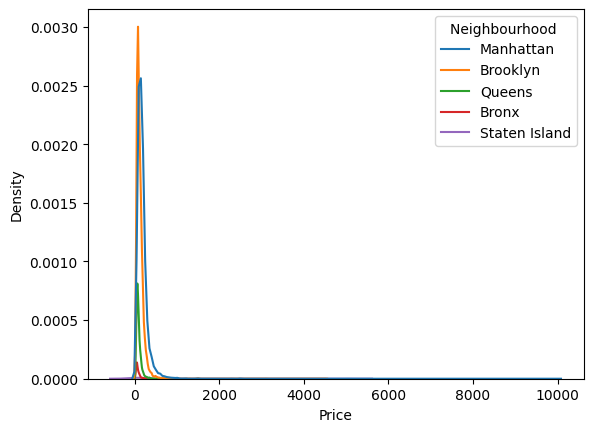

In [ ]:
# Kernel density plot of price
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ')
plt.show()

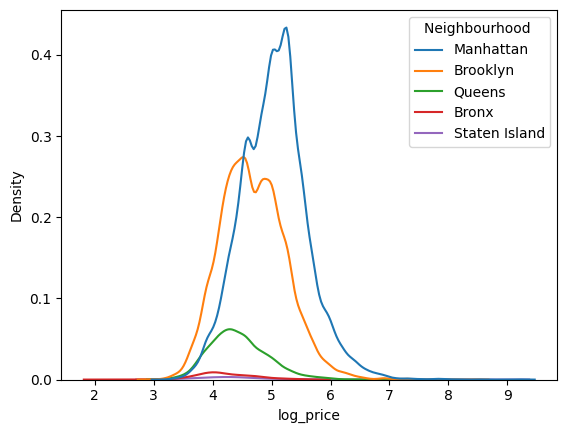

In [ ]:
# Kernel density plot of log price
log_price = np.log(df['Price'])
df['log_price'] = log_price
sns.kdeplot(data=df, x='log_price', hue='Neighbourhood ')
plt.show()

In [ ]:
# 2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear
# model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see?
# What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype = 'int')

from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model, without an intercept
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results


# The coefficients listed below are the same as the means from the table in part 1, meaning that the regression is just calculating the group averages
# since there are no other control variables.

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [ ]:
# 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently?
# What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression().fit(X, y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
print('Intercept: ', reg.intercept_)
results

# The intercept is 75.28. In order to get the coefficients from the previous question, we can add the intercept to the new coefficient values.
# This regression dropped the Bronx observation (as a result of using drop_first = True). The previous coefficient value for the Bronx is now the
# intercept value, making all variable coefficients relative to the Bronx.

R-squared:  0.04631389606035197
Intercept:  75.27649769585331


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [ ]:
# 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood.
# What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['Price']
X = df[['Review Scores Rating', 'Neighbourhood ']]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train) # Fit the linear model without the intercept

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('Review Scores Rating coefficient: ', results.loc[0,'coefficient'])
results

Rsq:  0.06701086106947296
RMSE:  125.01092061382933
Review Scores Rating coefficient:  1.0322568767213838


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [ ]:
# multiple the review scores rating coefficient value by 100, then add the max coefficient value to that
print((results.loc[0,'coefficient']*100)+(max(results.loc[:,'coefficient'])))

# The most expensive property you can rent is in Manhattan, for $192.65.

192.64670789973746


In [ ]:
# 5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type.
# What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
df['Property Type'].unique()

array(['Apartment', 'Other', 'Bed & Breakfast', 'Loft', 'Condominium',
       'House', 'Townhouse', 'Dorm', 'Boat', 'Cabin', 'Villa', 'Bungalow',
       'Camper/RV', 'Treehouse', 'Lighthouse', 'Chalet', 'Castle', 'Hut'],
      dtype=object)

In [ ]:
# consolidate categories -- especially questionable categories that only have a few values
# this makes it easier to analyze the data
types = df['Property Type']
types = types.replace(['Chalet','Bungalow','Cabin','Castle','Lighthouse', 'Hut'],'Other')

df['Property Type'] = types
del types

df['Property Type'].value_counts()

,count
Property Type,
Apartment,19656
House,1559
Loft,591
Bed & Breakfast,136
Townhouse,83
Condominium,48
Other,37
Dorm,22
Boat,6


In [ ]:
# Split the sample:
y = df['Price']
X = df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Property Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                   pd.get_dummies(X_test['Property Type'], dtype='int')], axis = 1)

reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train) # Fit the linear model without the

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('Review Scores Rating coefficient: ', results.loc[0,'coefficient'])
results

Rsq:  0.07503916054602289
RMSE:  124.47190390125817
Review Scores Rating coefficient:  1.0141231261718564


,variable,coefficient
0,Review Scores Rating,1.014123
1,Bronx,-23.106244
2,Brooklyn,33.789223
3,Manhattan,96.312283
4,Queens,4.270452
5,Staten Island,49.491805
6,Apartment,-6.900787
7,Bed & Breakfast,-38.245920
8,Boat,59.997566
9,Camper/RV,-20.386179


In [ ]:
print((results.loc[0,'coefficient']*100)+(results.loc[3,'coefficient'])+(results.loc[10,'coefficient']))

# The most expensive property you can rent is a condominium in Manhattan for $285.67.

285.6680878380222


In [ ]:
# 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

In [ ]:
# The Review Scores Rating coefficient in part 4 was 1.03 whereas in part 5 it decreased to 1.01. This is because when we added the Property Type
# variable to the regression, the other variables become less powerful predictors since some of their predictive power correlates to Property Type.
# In this case, the Review Scores Rating coefficient only decreased slightly, so the predictive power between the variables in part 4 and 5 are
# likely still similar.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [ ]:
# 1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues,
# but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is
# most appropriate.

In [2]:
df = pd.read_csv("/content/cars_hw.csv")
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Make,0
Make_Year,0
Color,0
Body_Type,0
Mileage_Run,0
No_of_Owners,0
Seating_Capacity,0
Fuel_Type,0
Transmission,0


In [7]:
df['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

<Axes: >

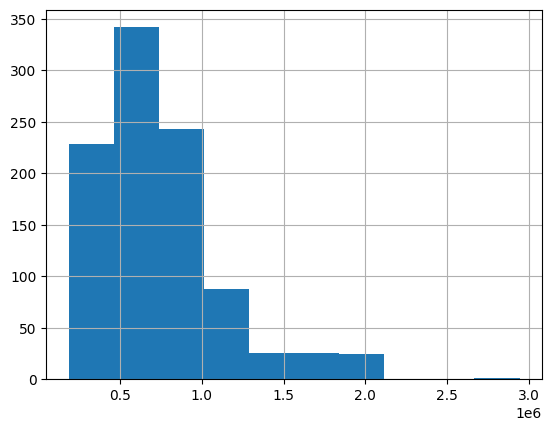

In [8]:
df['Price'].hist()

<Axes: ylabel='Price'>

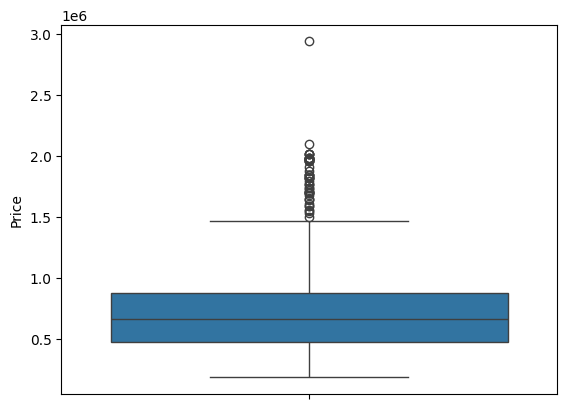

In [9]:
sns.boxplot(df['Price'])

<Axes: ylabel='price_ihs'>

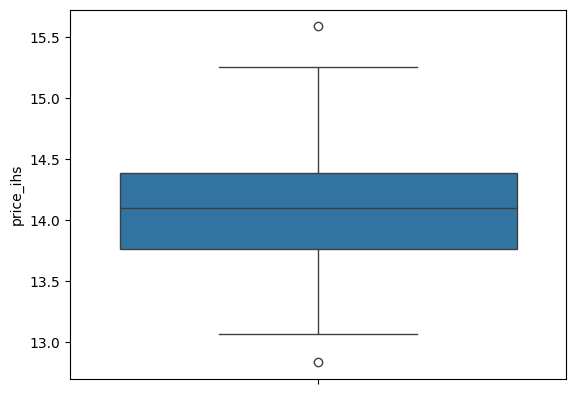

In [10]:
df['price_ihs'] = np.arcsinh(df['Price'])
sns.boxplot(df['price_ihs'])

In [ ]:
# 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make).
# Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

<Axes: xlabel='Price', ylabel='Density'>

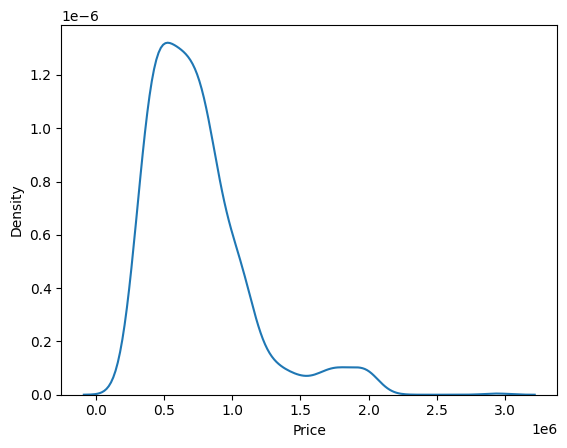

In [11]:
sns.kdeplot(x=df['Price'])

In [14]:
df['Price'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


In [12]:
df['price_ihs'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


<Axes: xlabel='price_ihs', ylabel='Density'>

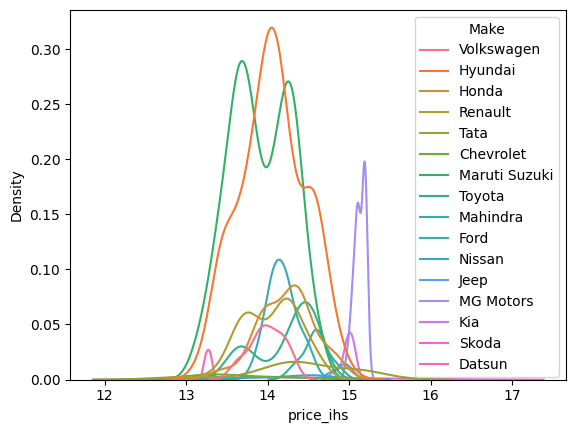

In [13]:
sns.kdeplot(data=df, x='price_ihs', hue='Make')

In [ ]:
# The most expensive brand is MG Motors. Most of the brands are clustered around the center of the graph, having relatively similar average
# prices. Most brands also only have one peak, except Maruti Suzuki, MG Motors, and Mahindra. In terms of max and min, there is a significant
# range with the cheapest car costing 188,000 (a Tata) and the most expensive car costing 2,941,000 (a Skoda). Hyundai and Maruti Suzuki also
# have the highest amount of observations, with 305 and 293 observations respectively.

In [ ]:
# 3. Split the data into an 80% training set and a 20% testing set.

In [46]:
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize the order in which data appears
train_size = int(.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['price_ihs']

df_test = df[train_size:]
y_test = df_test['price_ihs']

In [ ]:
# 4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set?
# Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features
# alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model
# performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set?
# Does the joint model perform better or worse, and by how much?

In [47]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,price_ihs
443,444,Hyundai,2017,red,suv,57167,1st,5,petrol,6-Speed,Manual,1064000,14.570693
869,870,Maruti Suzuki,2021,grey,hatchback,15836,1st,5,petrol,5-Speed,Manual,520000,13.854731
229,230,Hyundai,2017,silver,suv,44894,1st,5,diesel,6-Speed,Manual,1235000,14.719729
439,440,Hyundai,2019,white,suv,26198,1st,5,petrol,6-Speed,Automatic,1274000,14.750819
30,31,Maruti Suzuki,2011,red,hatchback,79565,1st,5,petrol,5-Speed,Manual,237000,13.068963


In [48]:
from sklearn import linear_model
numeric_vars = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']

X_train_numeric = df_train.loc[:, numeric_vars]
reg_numeric = linear_model.LinearRegression().fit(X_train_numeric, y_train)
X_test_numeric = df_test.loc[:, numeric_vars]
y_hat = reg_numeric.predict(X_test_numeric)
print('Numeric Rsq: ', reg_numeric.score(X_test_numeric,y_test))
rmse_numeric = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric RMSE: ', rmse_numeric)

Numeric Rsq:  0.45928794620074154
Numeric RMSE:  0.31999083539325857


In [49]:
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

dummies = pd.DataFrame([])
for var in categorical_vars:
    new_dummies = pd.get_dummies( df.loc[:, var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True)
    X_train_categorical = dummies.iloc[0:train_size,:]
    X_test_categorical = dummies.iloc[train_size:,:]

reg_categorical = linear_model.LinearRegression().fit(X_train_categorical, y_train)
y_hat = reg_categorical.predict(X_test_categorical)
print('Categorical Rsq: ', reg_categorical.score(X_test_categorical,y_test)) # R2
rmse_numeric = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Categorical RMSE: ', rmse_numeric) # R2

Categorical Rsq:  0.6336275482432376
Categorical RMSE:  0.263400090607654


In [50]:
X_train = pd.concat([X_train_numeric, X_train_categorical], axis=1, ignore_index=True)
reg = linear_model.LinearRegression().fit(X_train, y_train)
X_test = pd.concat([X_test_numeric, X_test_categorical], axis=1, ignore_index=True)
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse_numeric = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse_numeric)

Rsq:  0.8014203683715554
RMSE:  0.19391967069472585


In [ ]:
# The categorical-only model performed better than the numeric-only model, perhaps because it included more variables. The combined model
# performed the best out of the 3 models, with an Rsq of .801.

In [ ]:
# 5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the
# degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded
# features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?

In [45]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,11):
  expander = PolynomialFeatures(degree=d,include_bias=False) # Create the expander
  Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_train_new_n = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

  Z = expander.fit_transform(X_test_numeric)
  names = expander.get_feature_names_out()
  X_test_new_n = pd.DataFrame(data=Z, columns = names)

  X_train_new_n.reset_index(drop=True, inplace=True)
  X_train_categorical.reset_index(drop=True, inplace=True)
  X_train_all = pd.concat([X_train_new_n, X_train_categorical], axis=1, ignore_index=True)

  # Reset indices for concatenating:
  X_test_new_n.reset_index(drop=True, inplace=True)
  X_test_categorical.reset_index(drop=True, inplace=True)
  X_test_all = pd.concat([X_test_new_n, X_test_categorical], axis=1, ignore_index=True)

  # Regression metrics:
  reg_new = linear_model.LinearRegression().fit(X_train_new_n,y_train)
  print(d, ' Rsq: ', reg_new.score(X_test_new_n,y_test))
  y_hat_all = reg_new.predict(X_test_new_n)
  rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
  print(d, 'RMSE: ', rmse_all)

1  Rsq:  0.4197590671796392
1 RMSE:  0.343779497549684
2  Rsq:  0.42538225554577336
2 RMSE:  0.34210963666689
3  Rsq:  0.4248534914930189
3 RMSE:  0.34226700535575305
4  Rsq:  0.4326084874396572
4 RMSE:  0.3399516932692244
5  Rsq:  0.4062868013498422
5 RMSE:  0.347747601334166
6  Rsq:  0.34819573592293873
6 RMSE:  0.3643631011972402
7  Rsq:  0.31524309949379836
7 RMSE:  0.3734599200657899
8  Rsq:  0.2588789932161071
8 RMSE:  0.3885262379143185
9  Rsq:  0.08144635028758884
9 RMSE:  0.43254177164531865
10  Rsq:  -0.7473625595422573
10 RMSE:  0.5965780965607679


In [ ]:
# The best model has a degree of 4, with an Rsq of .432. This is the best model with expanded features, yet it is still performing much
# lower than the best model from part 4. At a degree of 10, the Rsq is negative at -.747.

In [ ]:
# 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and
# true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot.
# Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [51]:
# Best model so far:
X_train = pd.concat([X_train_numeric, X_train_categorical], axis=1, ignore_index=True)
reg = linear_model.LinearRegression().fit(X_train, y_train)
X_test = pd.concat([X_test_numeric, X_test_categorical], axis=1, ignore_index=True)
y_hat = reg.predict(X_test)
print('Rsq: ', reg.score(X_test,y_test))
rmse_numeric = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse_numeric)

Rsq:  0.8014203683715554
RMSE:  0.19391967069472585


<Axes: xlabel='price_ihs'>

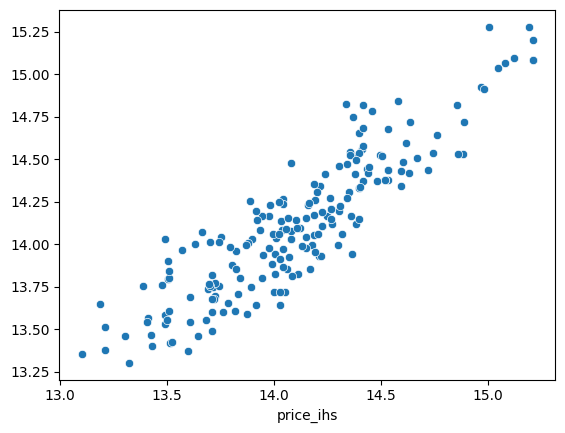

In [55]:
sns.scatterplot(x=y_test,y=y_hat)
# values roughly line up, forming a diagonal but some could probably be slightly more accurate

<Axes: xlabel='price_ihs', ylabel='Density'>

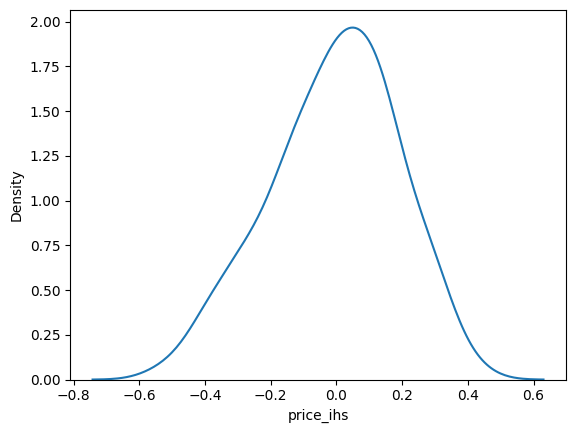

In [56]:
residuals = y_test - y_hat
sns.kdeplot(x=residuals)
# values are roughly bell-shaped around 0. looks good!

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?